# Comunicações e Processamento de Sinal (CPS)
## Semana 1 - Introdução 
## Exemplo de Modulação em Amplitude (Sinais Analógicos)
https://en.wikipedia.org/wiki/Amplitude_modulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

## Leitura de um sinal

In [5]:
fs, dados = wavfile.read('FalaSala.wav')

/var/folders/b0/pby504x52xsc70n533t4_qpc0000gn/T/ipykernel_8362/1718529783.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, dados = wavfile.read('FalaSala.wav')


In [14]:
len(dados)

340480

In [17]:
t = np.arange(0,len(dados)/fs,1/fs)

In [16]:
len(t)

340480

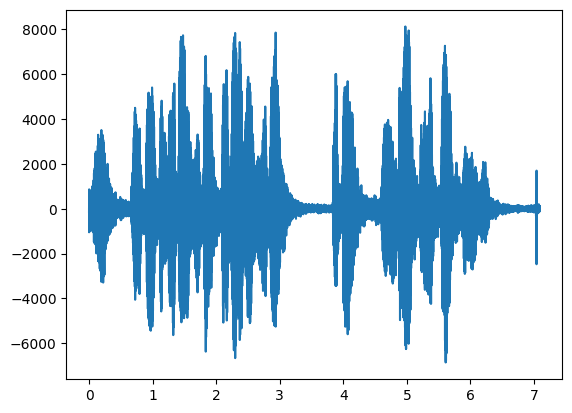

In [20]:
plt.plot(t[:-1],dados) #t e dados não tinham o mesmo tamanho (começa em zero - optamos por retirar do t um dos pontos)

## Espectro

In [28]:
X = np.fft.fft(dados)/len(dados)

In [29]:
f = np.arange(len(X))*fs/len(X)

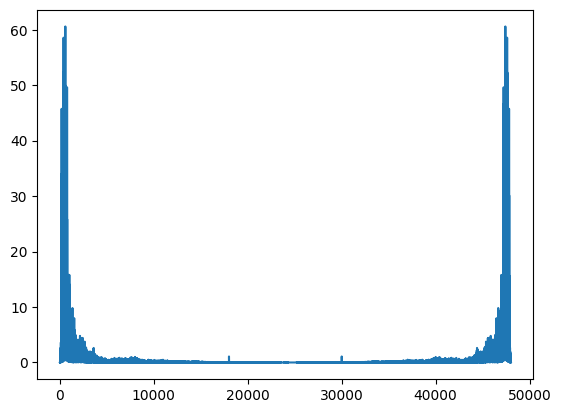

In [30]:
plt.plot(f, np.abs(X))

## Desenho de um filtro passa baixo (FIR)

In [32]:
from scipy import signal

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html

In [57]:
fc = 8000 # frequencia de corte do filtro
numtaps = 101 # numero de coeficientes
bk = signal.firwin(numtaps, fc, fs=fs)  # cria um filtro FIR passa baixo

In [58]:
f1, H1 = signal.freqz(bk, fs = fs) # calcular a resposta em frequencia - H(w)

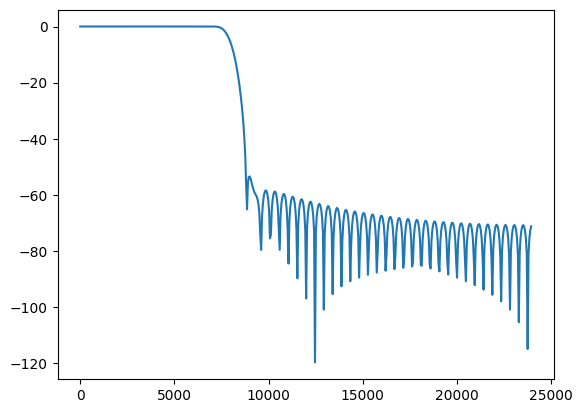

In [59]:
#plt.plot(f1, np.abs(H1)) # visualizacao do modulo da resposta em frequencia |H(w)|
plt.plot(f1, 20*np.log10(np.abs(H1))) # visualizacao do modulo da resposta em frequencia |H(w)|dB

## Filtragem

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html

In [45]:
y = signal.lfilter(bk, [1], dados)

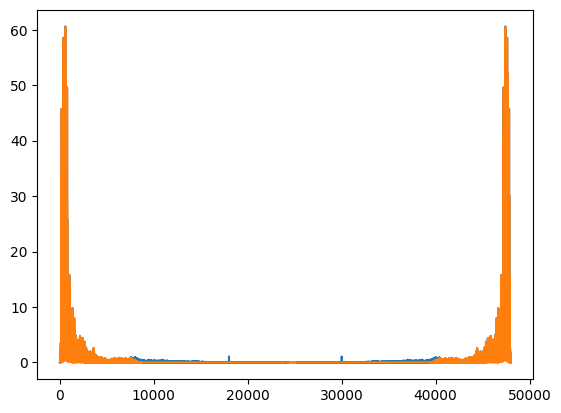

In [61]:
Y = np.fft.fft(y)/len(y)
plt.plot(f, np.abs(X))
plt.plot(f, np.abs(Y))
#plt.axis([0,10000, 0,70])

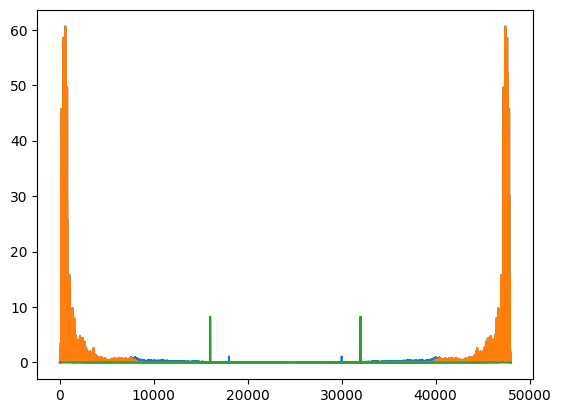

In [63]:
portadora = 20* np.cos(2*np.pi*16000*t[0:-1])
Z = np.fft.fft(portadora)/len(portadora)
plt.plot(f, np.abs(X))
plt.plot(f, np.abs(Y))
plt.plot(f, np.abs(Z))

## Modulação

In [64]:
novoSinal = y * portadora

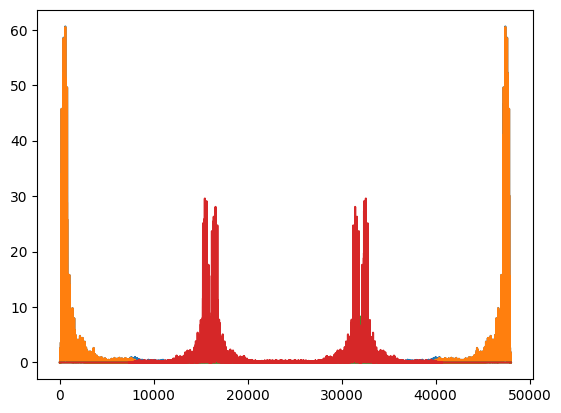

In [66]:
N = np.fft.fft(novoSinal)/len(novoSinal)/20
plt.plot(f, np.abs(X))
plt.plot(f, np.abs(Y))
plt.plot(f, np.abs(Z))
plt.plot(f, np.abs(N))